# Self response, self response absolute and zero correlation model

In [1]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [27]:
def self_response_self_abs_zero_corr_plot(ticker, days, t_step):
    """
    Plot the self response, self response absolute and zero correlation model
    during an interval of time (days) in independent plots in a figure. The
    data is loaded from the self response data results, the self response
    absolute data results and zero correlation model data results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """
    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for d, day in enumerate(days):

        print('Processing data for the stock ' + ticker + ' the day ' + day
              + ' March, 2016')

        self_ = pickle.load(open(
         '../Data/self_response_data_{}ms/self_201603{}_{}i_{}ms.pickl'
         .format(t_step, day, ticker, t_step), 'rb'))
        abs_ = pickle.load(open(
         '../Data/self_response_abs_data_{}ms/self_abs_201603{}_{}i_{}ms.pickl'
         .format(t_step, day, ticker, t_step), 'rb'))
        zero = pickle.load(open("".join((
         '../Data/zero_correlation_data_{}ms/zero_correlation_201603{}_{}i'
         + '_rand_{}ms.pickl').split())
         .format(t_step, day, ticker, t_step), 'rb'))

        plt.subplot(len(days), 1, d+1)
        plt.semilogx(self_, '-', label='Self response Stock i {} - {}'
                     .format(ticker, day))
        plt.semilogx(abs_, '-', label='Self response abs Stock i {} - {}'
                     .format(ticker, day))
        plt.semilogx(zero, '-', label='Zero correlation Stock i {} - {}'
                     .format(ticker, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response $ R_{ii} (\tau) $')
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir('../Data/self_res_self_abs_zero_corr_plot_{}ms/'
                          .format(t_step))):
        os.mkdir('../Data/self_res_self_abs_zero_corr_plot_{}ms/'
                 .format(t_step))
        print('Folder to save plot created')

    plt.savefig("".join((
        '../Data/self_res_self_abs_zero_corr_plot_{}ms/self_res_self_abs_'
        + 'zero_corr{}_{}ms.png').split()).format(t_step, ticker, t_step))

    return None

In [28]:
# Using the AAPL stock
ticker_i = 'AAPL'
days = ['07', '08', '09', '10', '11']
t_step = 1000

Processing data for the stock AAPL the day 07 March, 2016
Processing data for the stock AAPL the day 08 March, 2016
Processing data for the stock AAPL the day 09 March, 2016
Processing data for the stock AAPL the day 10 March, 2016
Processing data for the stock AAPL the day 11 March, 2016


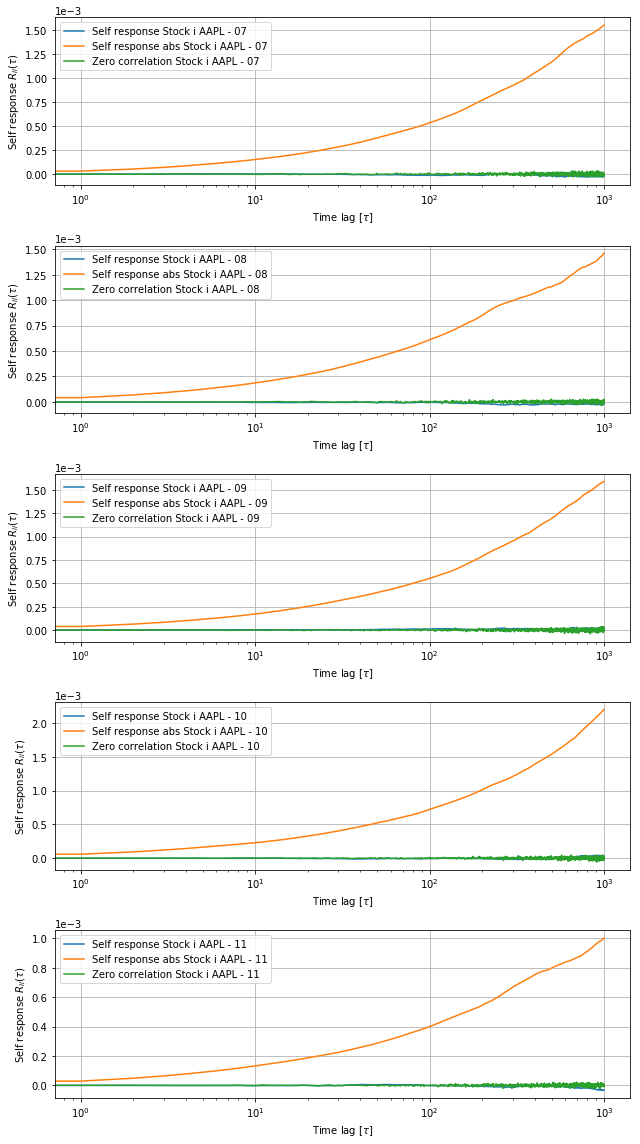

In [29]:
self_response_self_abs_zero_corr_plot(ticker_i, days, t_step)